In [10]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Question 1 b)
The Boxlot looks different than the one I drew, the whiskers are much shorter, only going to about -2 and 7.5.

In [3]:
Q1 = np.array([-15, -1, 1, 2, 3, 7, 7, 8, 25])

<AxesSubplot:>

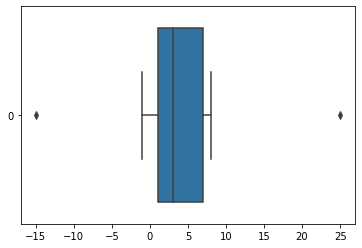

In [6]:
sns.boxplot(data=Q1, orient='h')

# Question 2

In [7]:
vehicles_df = pd.read_csv("vehicles.csv")
vehicles_df

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axisrectangular,lengthrectangular,majorvariance,minorvariance,gyrationradius,majorskewness,minorskewness,minorkurtosis,majorkurtosis,hollows_ratio,class
0,95,43,96,202,65,10,189,35,22,143,217,534,166,71,6,27,190,197,opel
1,96,52,104,222,67,9,198,33,23,163,217,589,226,67,12,20,192,201,opel
2,107,52,101,218,64,11,202,33,23,164,219,610,192,65,17,2,197,206,opel
3,97,37,78,181,62,8,161,41,20,131,182,389,117,62,2,28,203,211,opel
4,96,54,104,175,58,10,215,31,24,175,221,682,222,75,13,23,186,194,opel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,88,40,55,114,53,7,132,53,18,139,142,249,158,87,0,7,176,183,van
842,86,39,62,129,59,6,116,57,17,135,137,203,145,64,7,9,199,204,van
843,94,47,85,333,138,49,155,43,19,155,320,354,187,135,12,9,188,196,van
844,86,40,66,139,59,7,122,54,17,139,145,225,143,63,7,11,202,208,van


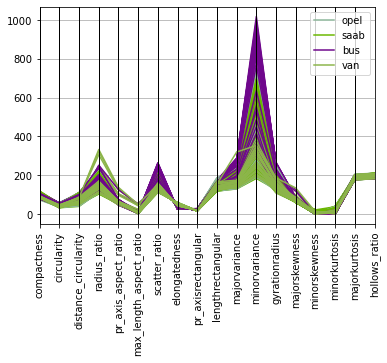

In [11]:
pd.plotting.parallel_coordinates(vehicles_df, 'class')
plt.xticks(rotation=90)
plt.show()

In [12]:
column_names = ['majorvariance', 'circularity', 'radius_ratio', 'max_length_aspect_ratio', 'elongatedness', 
               'lengthrectangular', 'minorvariance', 'majorskewness', 'minorkurtosis', 'hollows_ratio',
               'compactness', 'distance_circularity', 'pr_axis_aspect_ratio', 'scatter_ratio', 'pr_axisrectangular',
               'gyrationradius', 'minorskewness', 'majorkurtosis']

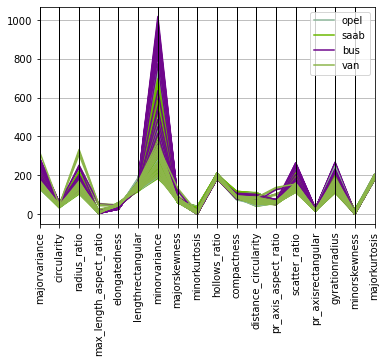

In [13]:
pd.plotting.parallel_coordinates(vehicles_df, 'class', cols=column_names)
plt.xticks(rotation=90)
plt.show()

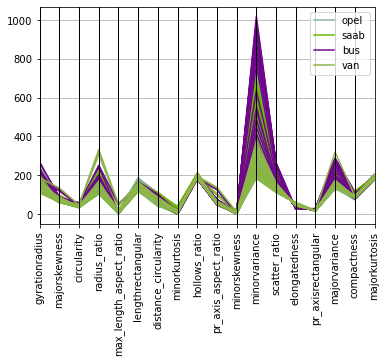

In [15]:
column_names = ['gyrationradius', 'majorskewness', 'circularity', 'radius_ratio', 'max_length_aspect_ratio', 
               'lengthrectangular', 'distance_circularity', 'minorkurtosis', 'hollows_ratio', 'pr_axis_aspect_ratio',
               'minorskewness', 'minorvariance',  'scatter_ratio', 'elongatedness',  'pr_axisrectangular',
               'majorvariance', 'compactness', 'majorkurtosis']

pd.plotting.parallel_coordinates(vehicles_df, 'class', cols=column_names)
plt.xticks(rotation=90)
plt.show()

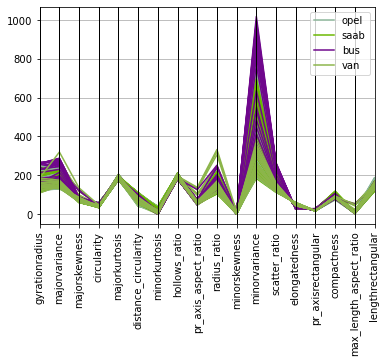

In [17]:
column_names = ['gyrationradius', 'majorvariance', 'majorskewness', 'circularity', 'majorkurtosis',
                'distance_circularity', 'minorkurtosis', 'hollows_ratio', 'pr_axis_aspect_ratio', 'radius_ratio',
               'minorskewness', 'minorvariance',  'scatter_ratio',  'elongatedness',  'pr_axisrectangular',
               'compactness', 'max_length_aspect_ratio', 'lengthrectangular']

pd.plotting.parallel_coordinates(vehicles_df, 'class', cols=column_names)
plt.xticks(rotation=90)
plt.show()

# Question 3 (b and c)

## 300 buffer
### false positives: 33

In [77]:
from collections import Counter, defaultdict
freq = defaultdict(int)
K = 300

def Misra_Gries(token):
    if len(freq.keys()) < K:
        freq[token] += 1
        
    elif token in freq:
        freq[token] += 1
        
    else:
        # d.copy()
        for key in freq.copy().keys():
            freq[key] -= 1
            if freq[key] == 0:
                del freq[key]


In [78]:
fp = open('tweet_words_one_week.txt','r')
while True:
    token = fp.readline()
    if not token:
        print("End of the stream")
        break
    Misra_Gries(token) # pass the token to be processed by the Misra-Gries algorithm

End of the stream


In [79]:
dict = {"rank" : [], "word":[], "frequency":[]}
test_df = pd.DataFrame(dict)
test_df

,rank,word,frequency


In [80]:
for rank, token in enumerate(sorted(freq, key=freq.get, reverse=True)):
    rank += 1
    # print(rank, token, freq[token])
    test_df.loc[len(test_df.index)] = [rank, token, freq[token]]
    
test_df

,rank,word,frequency
0,1,time\n,135298
1,2,love\n,66054
2,3,people\n,59067
3,4,video\n,42901
4,5,thanks\n,885
...,...,...,...
216,217,minute\n,1
217,218,dick\n,1
218,219,check\n,1
219,220,badmotive\n,1


In [81]:
test_df = test_df.replace(r'\n','', regex=True)
test_df

,rank,word,frequency
0,1,time,135298
1,2,love,66054
2,3,people,59067
3,4,video,42901
4,5,thanks,885
...,...,...,...
216,217,minute,1
217,218,dick,1
218,219,check,1
219,220,badmotive,1


In [82]:
true_tweet_df = pd.read_csv("unique_tweet_word_actual_freq.csv", names=['word', 'frequency'])
true_tweet_df

,word,frequency
0,time,403090
1,love,333846
2,people,326857
3,video,310639
4,thanks,262221
...,...,...
1809627,cellatla,1
1809628,ermenileri,1
1809629,rktme,1
1809630,pedohorse,1


In [83]:
true_tweet_300_df= true_tweet_df[true_tweet_df.index < 300] 
true_tweet_300_df

,word,frequency
0,time,403090
1,love,333846
2,people,326857
3,video,310639
4,thanks,262221
...,...,...
295,window,34579
296,shot,34567
297,yesterday,34551
298,fucking,34394


In [84]:
counter = 0
# print(true_tweet_300_df['word'][0])
for word in test_df['word']:
    # print(word)
    if true_tweet_300_df['word'].str.contains(word).any():
    # if (true_tweet_300_df['word'].eq(word)).any():
        counter +=1
print('false positives: ', counter)

false positives:  33


## 800 buffer
### false positives: 167

In [72]:
K = 800
fp = open('tweet_words_one_week.txt','r')
while True:
    token = fp.readline()
    if not token:
        print("End of the stream")
        break
    Misra_Gries(token) # pass the token to be processed by the Misra-Gries algorithm
    
dict = {"rank" : [], "word":[], "frequency":[]}
test_df = pd.DataFrame(dict)

for rank, token in enumerate(sorted(freq, key=freq.get, reverse=True)):
    rank += 1
    # print(rank, token, freq[token])
    test_df.loc[len(test_df.index)] = [rank, token, freq[token]]

test_df = test_df.replace(r'\n','', regex=True)

# true_tweet_df = pd.read_csv("unique_tweet_word_actual_freq.csv", names=['word', 'frequency'])

true_tweet_800_df= true_tweet_df[true_tweet_df.index < 800] 

counter = 0
for word in test_df['word']:
    
    if (true_tweet_800_df['word'].eq(word)).any():
        counter +=1
print('false positives: ', counter)


End of the stream
167


## 1000 buffer
### false positives: 257

In [74]:
K = 1000
fp = open('tweet_words_one_week.txt','r')
while True:
    token = fp.readline()
    if not token:
        print("End of the stream")
        break
    Misra_Gries(token) # pass the token to be processed by the Misra-Gries algorithm
    
dict = {"rank" : [], "word":[], "frequency":[]}
test_df = pd.DataFrame(dict)

for rank, token in enumerate(sorted(freq, key=freq.get, reverse=True)):
    rank += 1
    # print(rank, token, freq[token])
    test_df.loc[len(test_df.index)] = [rank, token, freq[token]]

test_df = test_df.replace(r'\n','', regex=True)

# true_tweet_df = pd.read_csv("unique_tweet_word_actual_freq.csv", names=['word', 'frequency'])

true_tweet_1000_df= true_tweet_df[true_tweet_df.index < 1000] 

counter = 0
for word in test_df['word']:
    
    if (true_tweet_1000_df['word'].eq(word)).any():
        counter +=1
print('false positives: ', counter)

End of the stream
false positives:  257


## 5000 buffer
### false positives:  2344

In [75]:
K = 5000
fp = open('tweet_words_one_week.txt','r')
while True:
    token = fp.readline()
    if not token:
        print("End of the stream")
        break
    Misra_Gries(token) # pass the token to be processed by the Misra-Gries algorithm
    
dict = {"rank" : [], "word":[], "frequency":[]}
test_df = pd.DataFrame(dict)

for rank, token in enumerate(sorted(freq, key=freq.get, reverse=True)):
    rank += 1
    # print(rank, token, freq[token])
    test_df.loc[len(test_df.index)] = [rank, token, freq[token]]

test_df = test_df.replace(r'\n','', regex=True)

# true_tweet_df = pd.read_csv("unique_tweet_word_actual_freq.csv", names=['word', 'frequency'])

true_tweet_5000_df= true_tweet_df[true_tweet_df.index < 5000] 

counter = 0
for word in test_df['word']:
    
    if (true_tweet_5000_df['word'].eq(word)).any():
        counter +=1
print('false positives: ', counter)

End of the stream
false positives:  2344


## 10,000 buffer
### false positives: 5244

In [76]:
K = 10000
fp = open('tweet_words_one_week.txt','r')
while True:
    token = fp.readline()
    if not token:
        print("End of the stream")
        break
    Misra_Gries(token) # pass the token to be processed by the Misra-Gries algorithm
    
dict = {"rank" : [], "word":[], "frequency":[]}
test_df = pd.DataFrame(dict)

for rank, token in enumerate(sorted(freq, key=freq.get, reverse=True)):
    rank += 1
    # print(rank, token, freq[token])
    test_df.loc[len(test_df.index)] = [rank, token, freq[token]]

test_df = test_df.replace(r'\n','', regex=True)

# true_tweet_df = pd.read_csv("unique_tweet_word_actual_freq.csv", names=['word', 'frequency'])

true_tweet_10000_df= true_tweet_df[true_tweet_df.index < 10000] 

counter = 0
for word in test_df['word']:
    
    if (true_tweet_10000_df['word'].eq(word)).any():
        counter +=1
print('false positives: ', counter)

End of the stream
false positives:  5244


# Question 4 d)

In [99]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import OneHotEncoder

In [93]:
df = pd.DataFrame(columns=['bread','coffee','sugar','milk','butter','cookies','eggs'])
df

,bread,coffee,sugar,milk,butter,cookies,eggs


In [94]:
def insert(df, row):
    insert_loc = df.index.max()

    if pd.isna(insert_loc):
        df.loc[0] = row
    else:
        df.loc[insert_loc + 1] = row

insert(df,[1, 1, 1, 0, 0, 0, 0])
insert(df,[1, 0, 0, 1, 0, 0, 0])
insert(df,[1, 0, 0, 1, 1, 0, 0])
insert(df,[0, 1, 0, 1, 0, 0, 0])
insert(df,[1, 0, 0, 0, 1, 1, 0])
insert(df,[0, 1, 1, 1, 0, 0, 0])
insert(df,[1, 0, 1, 1, 0, 0, 1])
insert(df,[1, 0, 0, 0, 1, 1, 0])
insert(df,[1, 0, 0, 1, 1, 0, 1])
insert(df,[0, 1, 0, 1, 0, 0, 1])
df

,bread,coffee,sugar,milk,butter,cookies,eggs
0,1,1,1,0,0,0,0
1,1,0,0,1,0,0,0
2,1,0,0,1,1,0,0
3,0,1,0,1,0,0,0
4,1,0,0,0,1,1,0
5,0,1,1,1,0,0,0
6,1,0,1,1,0,0,1
7,1,0,0,0,1,1,0
8,1,0,0,1,1,0,1
9,0,1,0,1,0,0,1


In [101]:
frq_items = apriori(df, min_support = 0.4, max_len=None, use_colnames = True)

C:\Users\arist\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


## Frequent Itemsets

In [102]:
frq_items.sort_values("support",ascending =False)

,support,itemsets
0,0.7,(bread)
2,0.7,(milk)
1,0.4,(coffee)
3,0.4,(butter)
4,0.4,"(bread, milk)"
5,0.4,"(bread, butter)"


## Rules

In [103]:
rules = association_rules(frq_items, metric ="confidence", min_threshold = 0.5)
rules = rules.sort_values('confidence', ascending =False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(butter),(bread),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
0,(bread),(milk),0.7,0.7,0.4,0.571429,0.816327,-0.09,0.7
1,(milk),(bread),0.7,0.7,0.4,0.571429,0.816327,-0.09,0.7
2,(bread),(butter),0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


## Got the same frequent itemsets and rules as well as their supp and conf values! 
See pdf 4c for reference